# Personalized Ratings and Recommendations for Restaurants

## Intro
I'm a foodie, I love trying out new restaurants. Yelp is my go to service for discovering new restaurants. I obviously tend to try out the highly rated restaurants whenever I go to a new locality. After having tried  almost all  > 4 star rated restaurants in my locality, I started visiting some lower rated restaurants to check them out. To my surprise, some of these lower rated restaurants turned out to have dishes that one like way more than a lot of the highly rated ones. Ever since I wanted to analyze the yelp dataset to figure out a way to personilze the rating of the restaurants to each individuals taste. This is the main motivation for the capstone project I'm proposing.

For this project, I aim to design a system that analyze a person's preferences based on past his past reviews/ratings and show a modified score/rating for the restaurants. This modified rating would be a better indicator for the person to decide while exploring new places. 

## The Data
Yelp's terms of use prohibit users from scrapping their site for data. So I'll be making use of the publicly avaliable Yelp academic dataset from this address : https://www.yelp.com/dataset

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import json,os
%matplotlib inline

In [2]:
data_dir = os.path.join(os.getcwd(),"Yelp_dataset")

In [3]:
#df = pd.read_json(os.path.join(data_dir,'review.json'),orient='records',lines=True)
#df.to_csv('Yelp_dataset/review_json_to_pd_to_csv.csv',encoding='utf-8',index=False)
df_reviews = pd.read_csv('Yelp_dataset/review_json_to_pd_to_csv.csv')
df_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0.0,v0i_UHJMo_hPBq9bxWvW4w,5.0,"Love the staff, love the meat, love the place....",0.0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0.0,vkVSCC7xljjrAI4UGfnKEQ,5.0,Super simple place but amazing nonetheless. It...,0.0,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0.0,n6QzIUObkYshz4dz2QRJTw,5.0,Small unassuming place that changes their menu...,0.0,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0.0,MV3CcKScW05u5LVfF6ok0g,5.0,Lester's is located in a beautiful neighborhoo...,0.0,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0.0,IXvOzsEMYtiJI0CARmj77Q,4.0,Love coming here. Yes the place always needs t...,0.0,bv2nCi5Qv5vroFiqKGopiw


In [4]:
df_reviews = df_reviews[['review_id','user_id','business_id','stars','date','text','useful','funny','cool']]

In [5]:
#df_business = pd.read_json(os.path.join(data_dir,'business.json'),orient='records',lines=True)
#df_business.to_csv('Yelp_dataset/business_json_to_pd_to_csv.csv',encoding='utf-8',index=False)
df_business = pd.read_csv('Yelp_dataset/business_json_to_pd_to_csv.csv')
df_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{u'AcceptsInsurance': True, u'ByAppointmentOnl...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{u'Tuesday': u'7:30-17:00', u'Friday': u'7:30-...",1,33.330690,-111.978599,Dental by Design,NaN,85044,22,4.0,AZ
1,3101 Washington Rd,"{u'BusinessParking': {u'garage': False, u'stre...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{u'Monday': u'9:00-20:00', u'Tuesday': u'9:00-...",1,40.291685,-80.104900,Stephen Szabo Salon,NaN,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,NaN,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{u'BusinessAcceptsCreditCards': True, u'Restau...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{u'Monday': u'10:00-21:00', u'Tuesday': u'10:0...",0,33.383147,-111.964725,Sports Authority,NaN,85282,9,3.0,AZ
4,581 Howe Ave,"{u'Alcohol': u'full_bar', u'HasTV': True, u'No...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{u'Monday': u'11:00-1:00', u'Tuesday': u'11:00...",1,41.119535,-81.475690,Brick House Tavern + Tap,NaN,44221,116,3.5,OH


In [6]:
#df_user = pd.read_json(os.path.join(data_dir,'user.json'),orient='records',lines=True)
#df_user.to_csv('Yelp_dataset/user_json_to_pd_to_csv.csv',encoding='utf-8',index=False)
df_user = pd.read_csv('Yelp_dataset/user_json_to_pd_to_csv.csv')
df_user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.67,0,0,0,0,0,0,0,0,1,...,0,[],0,"[cvVMmlU1ouS3I5fhutaryQ, nj6UZ8tdGo8YJ9lUMTVWN...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03
1,3.70,0,0,0,0,0,0,0,0,0,...,0,[],0,"[0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gp...",0,Chris,10,0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24
2,2.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Tiffy,1,0,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02
3,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Mark,6,0,mBneaEEH5EMyxaVyqS-72A,2015-03-13
4,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Evelyn,3,0,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08


### Distribution of Stars

In [7]:
df_vegas = df_business[df_business.city=='Las Vegas']
#df_vegas.reset_index(drop=True)

In [8]:
df_vegas.groupby('city').size()

city
Las Vegas    26775
dtype: int64

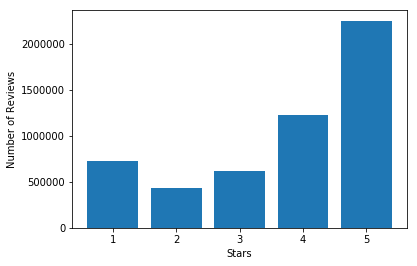

In [9]:
y = df_reviews.groupby('stars').size().tolist()
x = [1,2,3,4,5]
plt.bar(x,y)
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.show()

In [10]:
df_business.groupby('stars').size()

stars
1.0     3788
1.5     4303
2.0     9320
2.5    16148
3.0    23142
3.5    32038
4.0    33492
4.5    24796
5.0    27540
dtype: int64

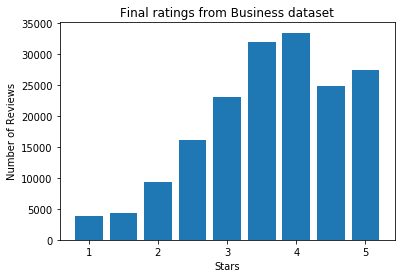

In [11]:
y = df_business.groupby('stars').size().tolist()
x = np.arange(1,5.5,0.5)
plt.bar(x,y,width=0.4)
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.title('Final ratings from Business dataset')
plt.show()

In [12]:
df_reviews_vegas = df_reviews[df_reviews.business_id.isin(df_vegas['business_id'])]

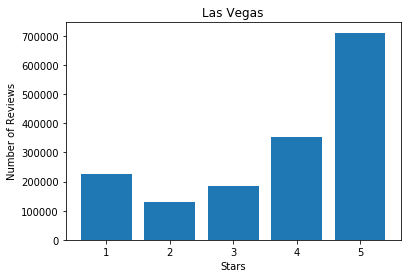

In [13]:
y = df_reviews_vegas.groupby('stars').size().tolist()
x = [1,2,3,4,5]
plt.bar(x,y)
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.title('Las Vegas')
plt.show()

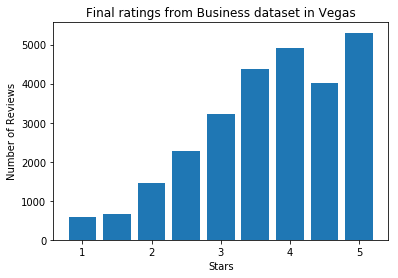

In [14]:
y = df_vegas.groupby('stars').size().tolist()
x = np.arange(1,5.5,0.5)
plt.bar(x,y,width=0.4)
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.title('Final ratings from Business dataset in Vegas')
plt.show()

The distribution of the final ratings of a business and the distribution of the stars from review seem to vary a bit. The star distribution of the ratings from the reviews dataset seems heavily skewed towards the 5 star, but the final ratings of the buisness, although tail heavy, does not seem that skewed.

In [15]:
df_reviews_business = df_business[['business_id','state','city']].merge(df_reviews,how='left',on='business_id')
states_grouped = df_reviews_business.groupby('state').size()

In [16]:
states_grouped = states_grouped[states_grouped >= 1000]
states = states_grouped.axes[0].tolist()
print states

['AZ', 'BW', 'EDH', 'HLD', 'IL', 'MLN', 'NC', 'NV', 'OH', 'ON', 'PA', 'QC', 'SC', 'WI']


In [17]:
df_interested_states_business = df_business[df_business.state.isin(states)]

In [18]:
df_interested_states_reviews = df_interested_states_business[['business_id','state','city']].merge(df_reviews,how='left',on='business_id')

In [19]:
state_stars_gobj = df_interested_states_reviews.groupby(['state','stars'])
state_stars_stat = state_stars_gobj.size()

In [20]:
states_dict = {st:i for i,st in enumerate(states)}
grid = np.zeros((len(states_dict),5))
for idx,cnt in state_stars_gobj.size().iteritems():
   grid[states_dict[idx[0]],int(idx[1]-1)] = cnt

In [21]:
grid_percent = (grid/grid.sum(axis=1,keepdims=True))

In [22]:
x,y = np.meshgrid(xrange(len(states_dict)),xrange(5))# plt.scatter(xrange(len(states_dict)),xrange(1,6)))

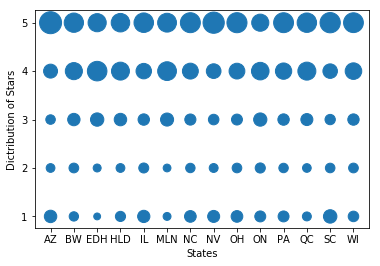

In [23]:
plt.scatter(x,y,s=grid_percent.T*1000)
plt.xticks(xrange(len(states)),states)
plt.yticks(xrange(5),xrange(1,6))
plt.xlabel('States')
plt.ylabel('Dictribution of Stars')
plt.show()

In [24]:
state_stars_gobj = df_interested_states_business.groupby(['state','stars'])
state_stars_stat = state_stars_gobj.size()

In [25]:
grid = np.zeros((len(states_dict),9))
star_dict={x:i for i,x in enumerate(np.arange(1,5.1,0.5))}
for idx,cnt in state_stars_gobj.size().iteritems():
   grid[states_dict[idx[0]],star_dict[idx[1]]] = cnt

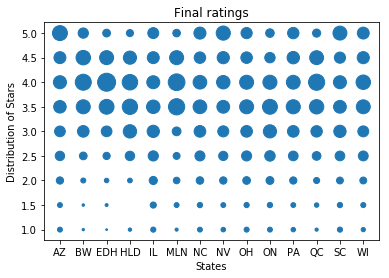

In [26]:
grid_percent = (grid/grid.sum(axis=1,keepdims=True))
x,y = np.meshgrid(xrange(len(states_dict)),xrange(9))# plt.scatter(xrange(len(states_dict)),xrange(1,6)))
plt.scatter(x,y,s=grid_percent.T*1000)
plt.xticks(xrange(len(states)),states)
plt.yticks(xrange(9),np.arange(1,5.1,0.5))
plt.xlabel('States')
plt.ylabel('Distribution of Stars')
plt.title('Final ratings')
plt.show()

Note that that the distribution is skewed towards  5 stars in the reviews given in the dataset, but this is not the case when looking at the ratings distribution from the business dataset. 

### Distribution of Review Count

In [27]:
user_review_count = df_reviews.groupby('user_id').size()

In [28]:
user_review_count.sum()

5261667

In [29]:
df_user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.67,0,0,0,0,0,0,0,0,1,...,0,[],0,"[cvVMmlU1ouS3I5fhutaryQ, nj6UZ8tdGo8YJ9lUMTVWN...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03
1,3.70,0,0,0,0,0,0,0,0,0,...,0,[],0,"[0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gp...",0,Chris,10,0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24
2,2.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Tiffy,1,0,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02
3,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Mark,6,0,mBneaEEH5EMyxaVyqS-72A,2015-03-13
4,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Evelyn,3,0,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08


In [30]:
df_user['review_count'].sum()

30655691

In [31]:
print df_user.shape
print len(df_reviews.groupby('user_id'))

(1326101, 22)
1326101


1326101 users in the data set with 30655691  total reviews counts, out of which 5261669 are given in the dataset.

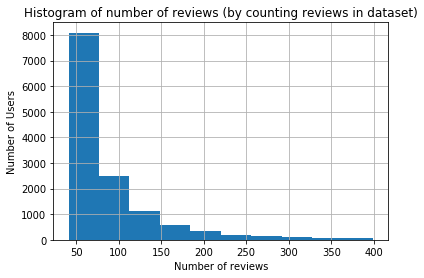

In [32]:
user_review_count[(user_review_count>40) & (user_review_count<400)].hist()
plt.xlabel('Number of reviews')
plt.ylabel('Number of Users')
plt.title('Histogram of number of reviews (by counting reviews in dataset)')

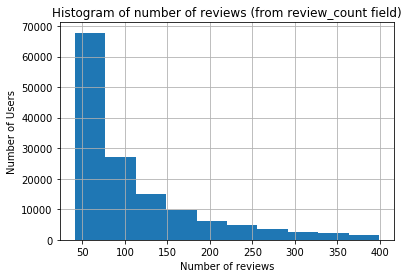

In [33]:
df_user[(df_user['review_count']<400) & (df_user['review_count']>40) ]['review_count'].hist()
plt.xlabel('Number of reviews')
plt.ylabel('Number of Users')
plt.title('Histogram of number of reviews (from review_count field)')

### Contradictory Reviews

In [34]:
business_5str = df_business[(df_business['stars']>4) & (df_business['review_count'] > 100)]

In [35]:
ids = list(business_5str['business_id'])
len(ids)

2099

In [36]:
df_rev_5strbus = df_reviews[df_reviews['business_id'].isin(ids)]

In [37]:
gobj = df_rev_5strbus.groupby(['business_id','stars'])
stat = gobj.sum()
stat.head(25)

useful  funny  cool
business_id            stars                     
-7PX_FOoCwktlunImRyZdg 1.0       0.0    6.0     0
                       2.0       8.0    3.0     1
                       3.0       9.0    3.0     1
                       4.0      38.0   15.0    33
                       5.0      47.0   11.0    25
-8ZiMXZReeTD3kwEvS0Lww 1.0       3.0    7.0     1
                       2.0       9.0   11.0     4
                       3.0       0.0    0.0     0
                       4.0      37.0    7.0    16
                       5.0     174.0   58.0    76
-9yq6bVqOn6Uywl9KhRToA 1.0       4.0    0.0     0
                       4.0       0.0    0.0     0
                       5.0      32.0    5.0     6
-AxKgZHxyV-oBBHNyOESAg 1.0       1.0    0.0     0
                       5.0      57.0    4.0    23
-Bdw-5H5C4AYSMGnAvmnzw 1.0      54.0   33.0    12
                       2.0      33.0   12.0    10
                       3.0     115.0   55.0    68
                       4.0     229.0   80.0   150
                       5.0     567.0  225.0   386
-C8sSrFqaCxp51pyo-fQLQ 1.0       1.0    0.0     0
                       2.0       4.0   10.0     3
                       3.0       8.0    3.0     5
                       4.0      76.0   37.0    61
                       5.0     127.0   63.0    97

In [38]:
df_1strRev_5strBus = df_reviews[(df_reviews['stars']==1)&(df_reviews['business_id'].isin(ids))]

In [39]:
df_2strRev_5strBus = df_reviews[(df_reviews['stars']==2)&(df_reviews['business_id'].isin(ids))]

In [40]:
df_3strRev_5strBus = df_reviews[(df_reviews['stars']==3)&(df_reviews['business_id'].isin(ids))]

In [41]:
df_4strRev_5strBus = df_reviews[(df_reviews['stars']==4)&(df_reviews['business_id'].isin(ids))]

In [42]:
df_5strRev_5strBus = df_reviews[(df_reviews['stars']==5)&(df_reviews['business_id'].isin(ids))]

In [43]:
business_1str = df_business[(df_business['stars']<3) & (df_business['review_count'] > 50)]

In [44]:
ids = list(business_1str['business_id'])
len(ids)

1708

In [45]:
df_rev_1strbus = df_reviews[df_reviews['business_id'].isin(ids)]

In [46]:
gobj = df_rev_1strbus.groupby(['business_id','stars'])
stat = gobj.sum()
stat.head(25)

useful  funny  cool
business_id            stars                     
-0WegMt6Cy966qlDKhu6jA 1.0      10.0    3.0     1
                       2.0       9.0    3.0     5
                       3.0      26.0   11.0    21
                       4.0       5.0    1.0     2
                       5.0       1.0    1.0     0
-2ToCaDFpTNmmg3QFzxcWg 1.0     357.0  144.0    75
                       2.0      68.0   45.0    25
                       3.0      39.0   20.0    16
                       4.0      55.0   33.0    37
                       5.0      19.0   14.0    15
-2qfXy3hcWG0GEcE8QUKQw 1.0     168.0   22.0    10
                       2.0      40.0    1.0     0
                       3.0       0.0    0.0     0
                       4.0       3.0    1.0     1
                       5.0      11.0    6.0     1
-5iyA2TptbQB9YmowvmVyQ 1.0     104.0    8.0    14
                       2.0       3.0    1.0     2
                       3.0       3.0    0.0     0
                       4.0      17.0   11.0    14
                       5.0       6.0    0.0     2
-9YyInW1wapzdNZrhQJ9dg 1.0      59.0   26.0    12
                       2.0      31.0   22.0    18
                       3.0      55.0   29.0    33
                       4.0      25.0   11.0     9
                       5.0       7.0    5.0     5

In [47]:
df_1strRev_1strBus = df_reviews[(df_reviews['stars']==1)&(df_reviews['business_id'].isin(ids))]

In [48]:
df_2strRev_1strBus = df_reviews[(df_reviews['stars']==2)&(df_reviews['business_id'].isin(ids))]

In [49]:
df_3strRev_1strBus = df_reviews[(df_reviews['stars']==3)&(df_reviews['business_id'].isin(ids))]

In [50]:
df_4strRev_1strBus = df_reviews[(df_reviews['stars']==4)&(df_reviews['business_id'].isin(ids))]
print df_4strRev_1strBus.shape

(29933, 9)


In [51]:
df_5strRev_1strBus = df_reviews[(df_reviews['stars']==5)&(df_reviews['business_id'].isin(ids))]
print df_5strRev_1strBus.shape

(25901, 9)


In [52]:
tot1 = df_1strRev_1strBus.shape[0]+df_2strRev_1strBus.shape[0]+df_3strRev_1strBus.shape[0]+df_4strRev_1strBus.shape[0]+df_5strRev_1strBus.shape[0]

In [53]:
tot2 =  df_1strRev_5strBus.shape[0] + df_2strRev_5strBus.shape[0] +df_3strRev_5strBus.shape[0]+df_4strRev_5strBus.shape[0]+df_5strRev_5strBus.shape[0]

In [54]:
grid = np.array([[df_1strRev_1strBus.shape[0],df_2strRev_1strBus.shape[0],df_3strRev_1strBus.shape[0],df_4strRev_1strBus.shape[0],df_5strRev_1strBus.shape[0]],[df_1strRev_5strBus.shape[0] , df_2strRev_5strBus.shape[0] , df_3strRev_5strBus.shape[0],df_4strRev_5strBus.shape[0],df_5strRev_5strBus.shape[0]]])
grid_percent = grid/np.array([[float(tot1)],[float(tot2)]])
print grid_percent*100

[[ 43.81442586  16.04650413  14.41065743  13.7931829   11.93522969]
 [  3.07596129   3.08683362   5.9737977   19.93494727  67.92846012]]


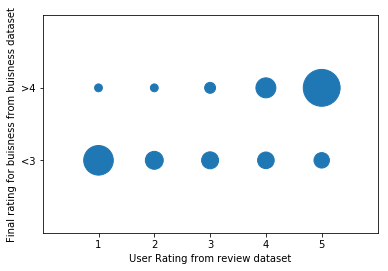

In [55]:
plt.scatter(np.array([[0,1,2,3,4],[0,1,2,3,4]]),np.array([[0,0,0,0,0],[1,1,1,1,1]]),s=grid_percent*2000)
plt.yticks([0,1],['<3','>4'])
plt.xticks(range(5),range(1,6))
plt.xlabel('User Rating from review dataset')
plt.ylabel('Final rating for buisness from buisness dataset')
plt.ylim([-1,2])
plt.xlim([-1,5])
plt.show()

This plot shows the number of reviews across different star rating for buisness with >4 star final rating and <3 star final rating. 

The bubbles in the upper left and lower right quadrant are the ones I'm interested in. These correspond to contradictory ratings by users. By contradictory, I mean that these reviews gave a significantly lower rating compred to the popular opinion which determined the final rating for the business. I would like to analyze these reviews to understand and get further insight.

Among the businesses with less that 3 star final rating, about 12% of the reviews gave 5 stars and nearly 14% of reviews gave 4 star. Implying nearly a quarter of the reviewers visiting these restaurants found them to be good on contrary to the popular opinion.

Now among the businesses with greater than 5 star final rating, we observe a slightly different trend. Only 6% of the crowd visitng these buisness had a contrary opinion.  Another 6% seem to have rated it at the mid level of 3 stars. An overwhelming 88% think of the reviews in the dataset are in the >= 4 star rating category.

In [56]:
from textblob import Blobber
from nltk.tokenize.regexp import RegexpTokenizer
from textblob.sentiments import NaiveBayesAnalyzer
from wordcloud import WordCloud

In [57]:
def extract_noun_phrases(df):
  texts =  df['text'].apply(lambda x: unicode(x,'utf-8'))
  tb = Blobber(analyzer=NaiveBayesAnalyzer(),tokenizer=RegexpTokenizer('\d{0,2}\w{2}'))

  nnp = []
  for txt in texts:
    blob = tb(txt)
    nnp.extend(blob.noun_phrases.singularize().lemmatize())

  return nnp

In [58]:
def wcloud(text):
  wc = WordCloud(background_color='white', width=1000, height=1000).generate(text)
  plt.rcParams['figure.figsize'] = (8.0, 8.0)
  plt.imshow(wc,interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [59]:
nnp = extract_noun_phrases(df_1strRev_5strBus)
nnp = pd.Series(nnp)
nnp.head()

0        hot wing
1     pizza crust
2    flour slurry
3     bland piece
4            otto
dtype: object

In [60]:
nnp.value_counts()[:50]

ca n't              1033
wo n't               987
customer service     965
never                922
yelp                 808
vega                 706
well                 675
not                  548
went                 516
wa                   437
really               431
horrible             429
las vega             428
worst                401
oh                   394
will                 384
thank                342
n't care             342
ordered              328
good review          324
terrible             305
needle               292
came                 277
please               266
got                  257
wow                  254
overall              244
sorry                239
seriously            233
great review         233
n't waste            232
groupon              232
too                  223
no                   219
bad experience       219
ice cream            212
ok                   204
bbq                  204
anyway               197
good thing           192


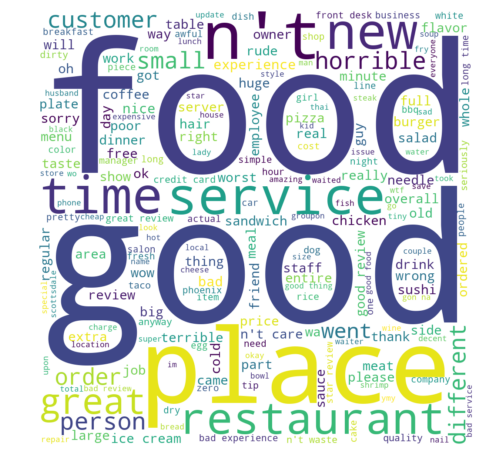

In [61]:
nnp_index = nnp.value_counts()[nnp.value_counts() >= 600].index
stopwords = list(nnp_index.values)
text = ' '.join([t for t in nnp if not any(s in t for s in stopwords)])
wcloud(text)

Word cloud formed from 1 star reviews given to a buisness with final rating greater than 4 stars.

Looking at the word cloud and the most frequent words from these reviews, it looks like there are a lot of words that we might have to discard to get better insight into these reviews.

In [62]:
nnp = extract_noun_phrases(df_2strRev_5strBus)
nnp = pd.Series(nnp)
nnp.head()

0    cool person
1           well
2        cat dog
3     litter box
4          wag n
dtype: object

In [63]:
nnp.value_counts()[:50]

wo n't              1152
ca n't              1002
vega                 927
yelp                 776
overall              727
well                 574
customer service     560
wa                   483
bbq                  448
ice cream            429
really               427
went                 422
oh                   394
not                  357
ordered              351
las vega             345
thai                 344
sorry                325
phoenix              281
too                  279
never                279
great review         277
came                 271
cirque               269
ok                   267
n't care             266
good thing           255
good review          247
anyway               244
will                 244
n't taste            242
long time            219
definitely           216
nice                 211
meh                  208
good food            208
got                  203
love                 195
thank                195
sadly                194


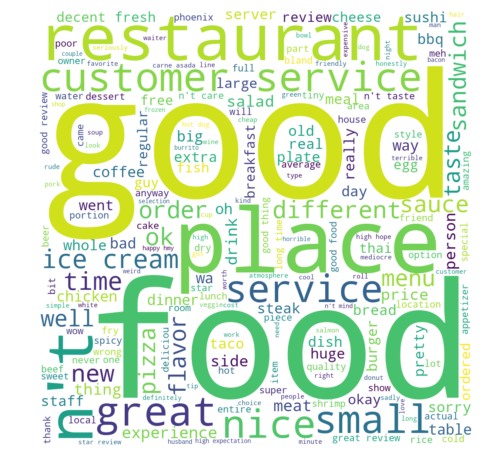

In [64]:
nnp_index = nnp.value_counts()[nnp.value_counts() >= 600].index
stopwords = list(nnp_index.values)
text = ' '.join([t for t in nnp if not any(s in t for s in stopwords)])
wcloud(text)

Word cloud formed from 2 star reviews given to a buisness with final rating greater than 4 stars.

Similar to the 1 star reviews, it looks likewe might have to discard  a lot of words to get better insight into these reviews.

In [65]:
nnp = extract_noun_phrases(df_3strRev_5strBus)
nnp = pd.Series(nnp)
nnp.head()

0         art lover
1     different art
2    different city
3       small piece
4         late 1800
dtype: object

In [66]:
nnp.value_counts()[:50]

overall             2552
vega                1978
ca n't              1744
yelp                1369
wo n't              1171
ice cream           1001
bbq                  968
wa                   825
thai                 795
nice                 737
las vega             697
came                 684
well                 682
went                 662
really               621
customer service     611
oh                   567
definitely           557
anyway               539
good food            536
price                528
love                 527
cirque               498
phoenix              496
ordered              487
happy hmy            477
will                 454
great place          435
korean               434
got                  398
n't taste            384
staff                382
good place           381
good thing           380
too                  375
n't care             373
lot                  371
ok                   365
hot dog              337
not                  334


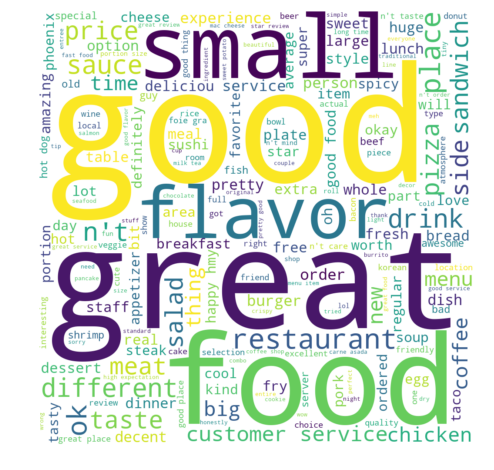

In [67]:
nnp_index = nnp.value_counts()[nnp.value_counts() >= 620].index
stopwords = list(nnp_index.values)
text = ' '.join([t for t in nnp if not any(s in t for s in stopwords)])
wcloud(text)

Word cloud formed from 3 star reviews given to a buisness with final rating greater than 4 stars.

Unlike the 1 and 2 star reviews, the words in 3 star reviews seems more indicative of the nature of the reviews. Based on these, it also seems like the reviews mostly have a positive tone to it. Doing a sentiment analysis would help to further under the data (even for 1 and 2 star reviews)

In [68]:
nnp = extract_noun_phrases(df_5strRev_1strBus)
nnp = pd.Series(nnp)
nnp.head()

0            yelp
1              lo
2           pizza
3           pepsi
4    door quicker
dtype: object

In [69]:
nnp.value_counts()[:50]

thank                     2528
vega                      2279
ca n't                    1105
love                      1059
las vega                  1031
great service              987
customer service           946
great experience           837
great place                604
will                       569
overall                    544
amazing                    535
awesome                    525
great job                  513
great food                 503
everyone                   489
definitely                 485
went                       448
bad review                 438
phoenix                    417
starbuck                   417
excellent                  408
well                       389
great time                 379
great customer service     377
highly                     376
ca                         369
oh                         354
staff                      353
nice                       348
new car                    344
wow                        340
wo n't  

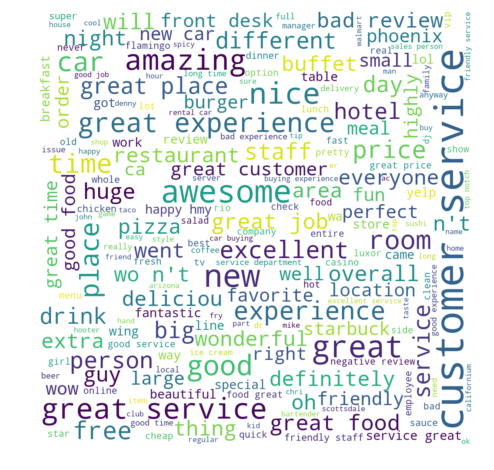

In [70]:
nnp_index = nnp.value_counts()[nnp.value_counts() >= 1000].index
stopwords = list(nnp_index.values)
text = ' '.join([t for t in nnp if not any(s in t for s in stopwords)])
wcloud(text)

Word cloud formed from 5 star reviews given to a buisness with final rating lesser than 3 stars.

In [71]:
nnp = extract_noun_phrases(df_4strRev_1strBus)
nnp = pd.Series(nnp)
nnp.head()

0               stumbled
1    typical sushi place
2                  price
3             party tray
4           coffee maker
dtype: object

In [72]:
nnp.value_counts()[:50]

vega                4349
overall             1857
ca n't              1459
las vega            1189
great place          880
luxor                843
nice                 758
love                 758
starbuck             736
thank                653
rio                  636
good food            615
flamingo             608
oh                   606
went                 598
well                 586
customer service     566
definitely           566
happy hmy            565
excalibur            563
great time           551
great service        543
lot                  520
came                 513
monte carlo          513
front desk           504
will                 490
yelp                 486
harrah               483
really               479
good time            477
mgm                  473
wo n't               456
wa                   456
got                  448
price                446
dj                   442
good experience      431
anyway               428
staff                425


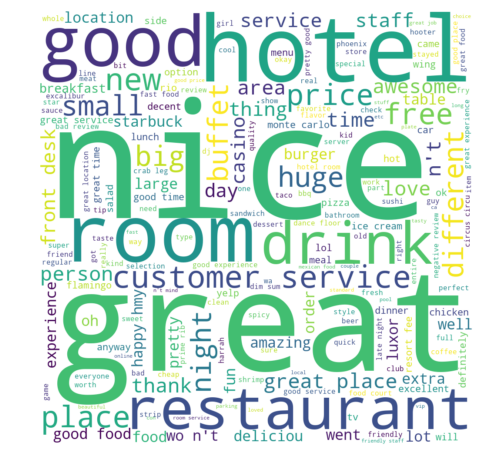

In [73]:
nnp_index = nnp.value_counts()[nnp.value_counts() >= 1000].index
stopwords = list(nnp_index.values)
text = ' '.join([t for t in nnp if not any(s in t for s in stopwords)])
wcloud(text)

Word cloud formed from 4 star reviews given to a buisness with final rating lesser than 3 stars.

Looking at the word clouds from 4 and 5 star reviews for  less than 3 star rated businesses it appears that the reviews are higly positive tone (as one would expect from 4 and 5 star reviews).

I would have to futher analyze and compare the condradicting with the reviews that are closer to the final rating to get insight into what people seem to disagree most for any given buisness. This would help us understand things like why a restaurant might be rated lower even though the food there is quite good (but serve and ambience is bad).